In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the uploaded CSV file to check its contents
air_quality = pd.read_csv('air_quality.csv')

In [3]:
# Display the first few rows of the dataframe
air_quality.head()

,DateTime,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,2022/12/1,14.763612,15.032070,14.044675,20.577618,16.180576,15.934196,15.842957,28.265266,16.660462,...,29.123183,14.706635,11.699391,24.823233,14.054602,27.778533,17.183289,14.026780,24.435136,13.181854
1,2022/12/2,10.964181,9.783391,10.660961,12.934785,10.600384,10.422483,11.126817,12.859860,10.218930,...,13.237380,9.789615,8.394410,13.216826,10.312061,12.933800,11.367997,9.152942,12.097866,9.195838
2,2022/12/3,10.190978,9.770701,10.524842,11.278421,9.986913,9.474237,10.088062,11.462597,8.699498,...,11.359000,10.185179,8.096509,10.296849,9.639557,10.835197,10.403444,8.161670,9.943323,8.395470
3,2022/12/4,15.177847,13.670484,13.426274,18.133414,12.474821,14.806196,14.597120,16.548691,14.172931,...,17.581017,13.696242,11.847493,16.789634,13.355394,16.583556,16.410631,10.452790,15.548103,12.135007
4,2022/12/5,9.306682,9.061679,9.254297,10.882815,9.089257,9.326154,9.678997,9.861535,8.958407,...,10.180402,9.066819,8.159373,9.932754,9.094672,10.008941,9.864148,8.624971,9.815260,8.390341


In [5]:
# Convert the 'DateTime' column to datetime format
air_quality['DateTime'] = pd.to_datetime(air_quality['DateTime'])

In [14]:
data_subset = air_quality.iloc[:, 1:]

In [15]:
# Calulate the mean of each column
column_means = data_subset.mean()

In [20]:
# Find the maximum value
max_mean = column_means.idxmax()

In [21]:
# Find the minimum mean
min_mean = column_means.idxmin()

In [24]:
# Find the median mean
median_mean = column_means.median()

In [25]:
# Calculate the absolute difference between each column's mean and the median of means
absolute_differences = (column_means - median_mean).abs()

# Find the column name with the smallest absolute difference, 
# which is the closest to the median mean value
closest_to_median_column = absolute_differences.idxmin()

In [27]:
print(f'Maximum average value among columns starting from the second: {max_mean}')
print(f'Median average value among columns starting from the second: {closest_to_median_column}')
print(f'Minimum average value among columns starting from the second: {min_mean}')

Maximum average value among columns starting from the second: Lewisham
Median average value among columns starting from the second: Kingston upon Thames
Minimum average value among columns starting from the second: Bromley


In [34]:
# Sort the average values in descending order
sorted_means = column_means.sort_values(ascending=False)

In [35]:
# Find the second_largest_mean_column
second_largest_mean_column = sorted_means.index[1]

In [36]:
print(f'The column name with the second largest mean is: {second_largest_mean_column}')

The column name with the second largest mean is: Richmond upon Thames


In [55]:
# Filter the dataframe for the selected boroughs
selected_boroughs = ['Richmond upon Thames', 'Kingston upon Thames', 'Bromley']
filtered_data = air_quality[['DateTime'] + selected_boroughs]

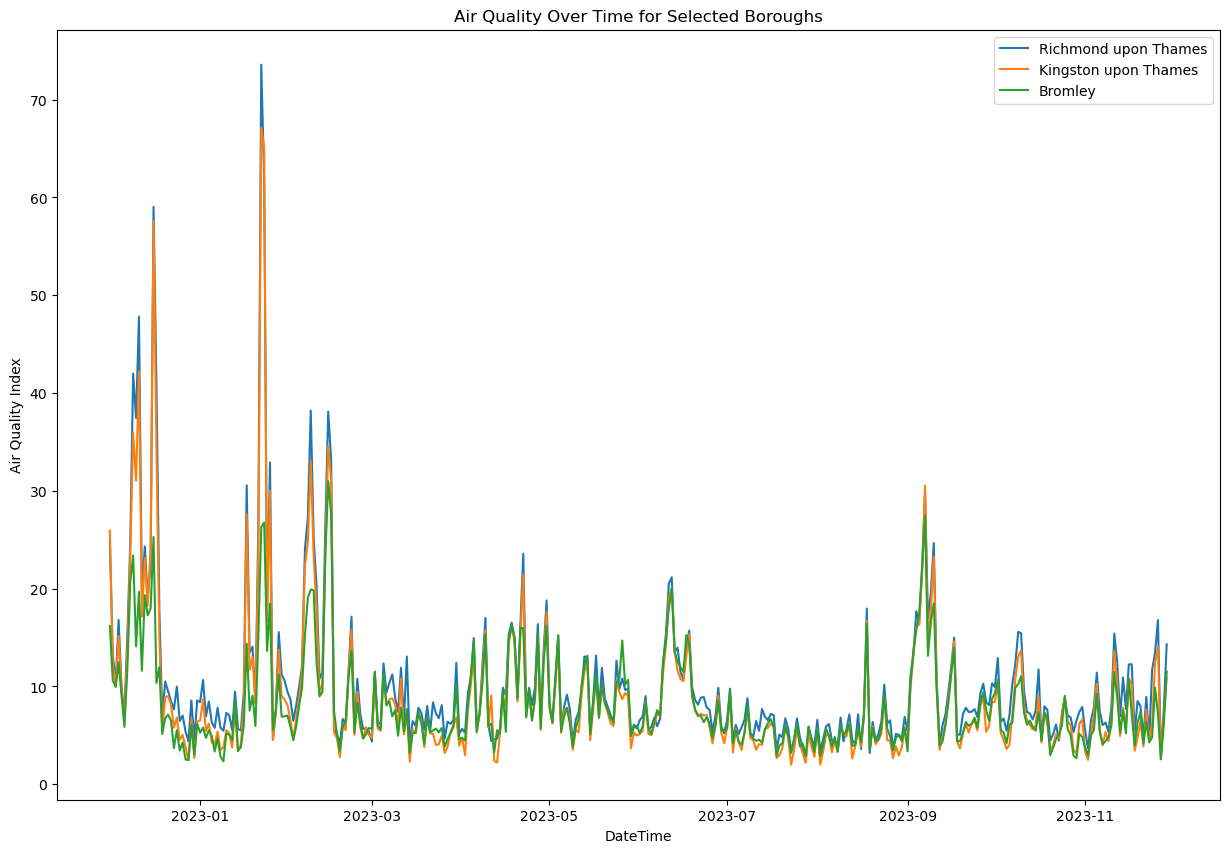

In [38]:
# Plotting
plt.figure(figsize=(15, 10))
for borough in selected_boroughs:
    plt.plot(filtered_data['DateTime'], filtered_data[borough], label=borough)

# Show the legend
plt.legend()

plt.title('Air Quality Over Time for Selected Boroughs')
plt.xlabel('DateTime')
plt.ylabel('Air Quality Index')

plt.show()

In [45]:
# Filter the dataframe for the selected boroughs
selected_boroughs_all = [
    "Tower Hamlets",
    "Haringey",
    "Newham",
    "Waltham Forest",
    "Hammersmith and Fulham",
    "Kensington and Chelsea",
    "Camden",
    "Islington",
    "Westminster",
    "Bexley",
    "Redbridge",
    "Lambeth",
    "Merton",
    "Greenwich",
    "Havering",
    "City of London",
    "Brent",
    "Ealing",
    "Wandsworth",
    "Hillingdon",
    "Harrow",
    "Barnet",
    "Hackney",
    "Southwark",
    "Croydon",
    "Kingston upon Thames",
    "Sutton",
    "Barking and Dagenham",
    "Hounslow",
    "Enfield"
]
filtered_data = air_quality[['DateTime'] + selected_boroughs_all]

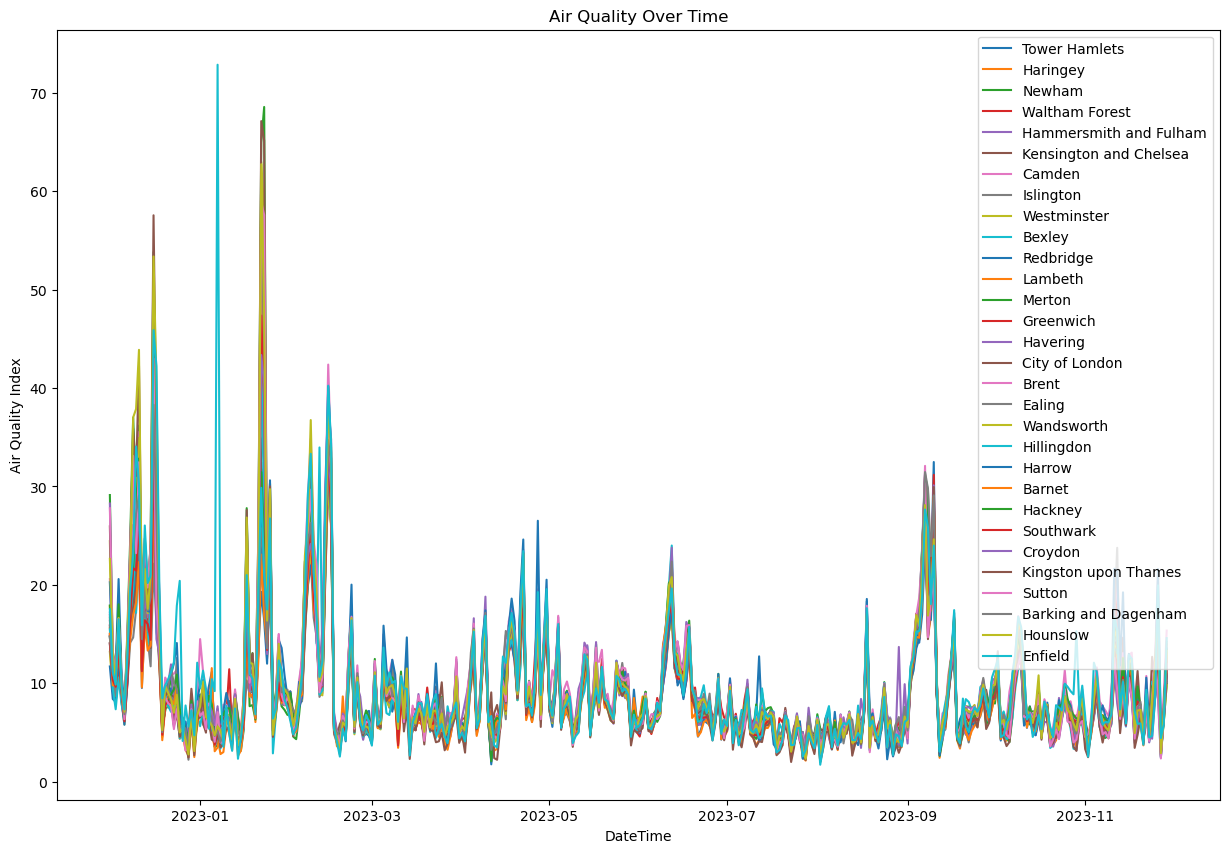

In [46]:
# Plotting
plt.figure(figsize=(15, 10))
for borough in selected_boroughs_all:
    plt.plot(filtered_data['DateTime'], filtered_data[borough], label=borough)

# Show the legend
plt.legend()

plt.title('Air Quality Over Time')
plt.xlabel('DateTime')
plt.ylabel('Air Quality Index')

plt.show()

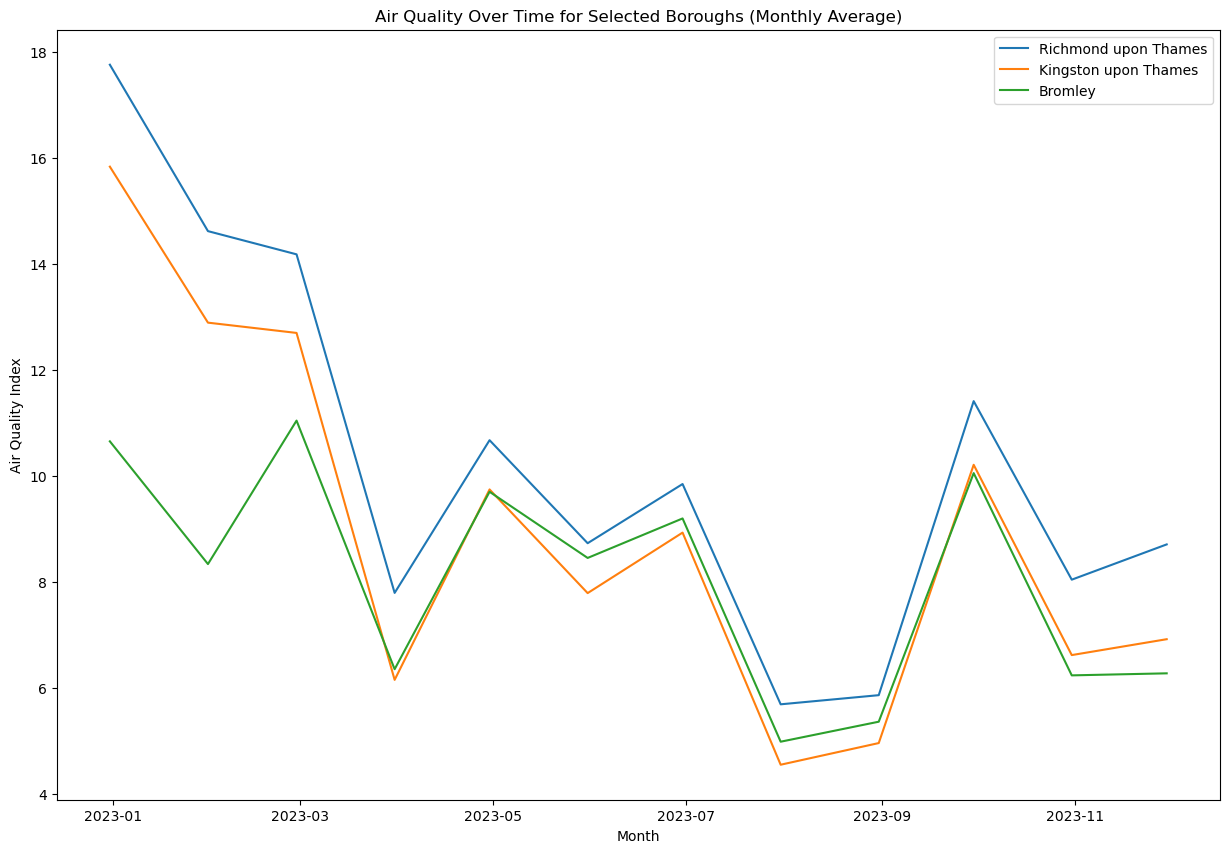

In [57]:
plt.figure(figsize=(15, 10))

for borough in selected_boroughs:
    # 按月重新采样并计算平均值
    monthly_data = filtered_data.resample('M', on='DateTime')[borough].mean()
    
    plt.plot(monthly_data.index, monthly_data, label=borough)

# 显示图例
plt.legend()

plt.title('Air Quality Over Time for Selected Boroughs (Monthly Average)')
plt.xlabel('Month')
plt.ylabel('Air Quality Index')

plt.show()

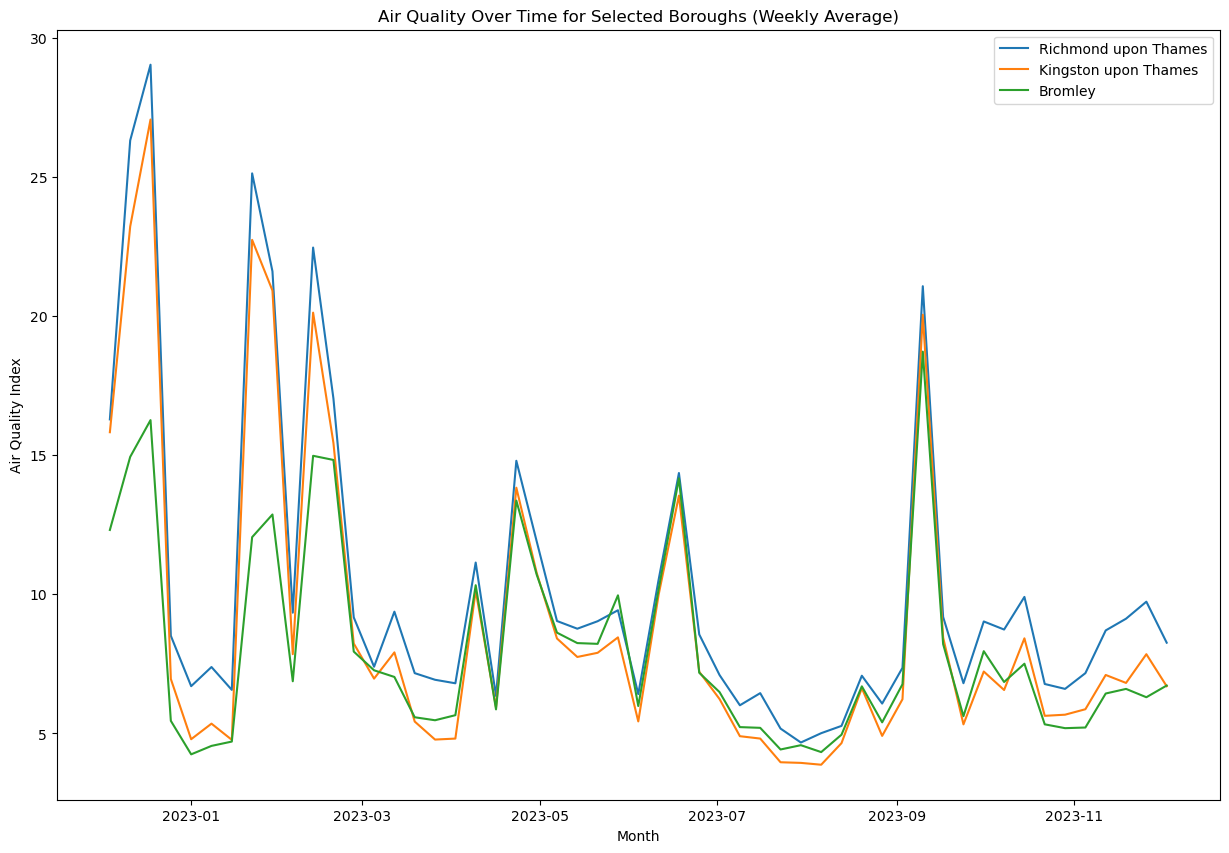

In [59]:
plt.figure(figsize=(15, 10))

for borough in selected_boroughs:
    # 按周重新采样并计算平均值
    weekly_data = filtered_data.resample('W', on='DateTime')[borough].mean()
    
    plt.plot(weekly_data.index, weekly_data, label=borough)

# 显示图例
plt.legend()

plt.title('Air Quality Over Time for Selected Boroughs (Weekly Average)')
plt.xlabel('Month')
plt.ylabel('Air Quality Index')

plt.show()

# GIF

In [6]:
import pandas as pd
import geopandas as gpd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize

In [7]:
# 读取CSV数据
csv_data = pd.read_csv('cycle_start_borough_daily_final_v3.csv')

In [14]:
# 读取SHP文件

gdf = gpd.read_file('maps/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')
#gdf.set_index('borough_identifier', inplace=True)

In [16]:
# gdf.set_index('borough_identifier', inplace=True)


In [17]:
# 加载空气质量数据
air_quality_data = pd.read_csv('air_quality.csv')

In [18]:
# 计算每个borough的质心
gdf['centroid'] = gdf.geometry.centroid

In [19]:
# 设置一个字典来保存每一帧的图像
frames = []

In [20]:
# 获取日期列表
dates = csv_data['Start date'].unique()

In [21]:
import os

for date in dates:
    # 格式化日期以用于文件名（将/替换为-）
    formatted_date = date.replace('/', '-')
    
    # 创建图像的每一帧
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, color='white', edgecolor='black')

    # 每天的数据
    daily_data = csv_data[csv_data['Start date'] == date]

    # 在每个质心位置绘制一个点
    for index, row in gdf.iterrows():
        borough_name = row['NAME']  # 确保这是您SHP文件中borough名称的正确字段
        if borough_name in daily_data.columns:
            usage_count = daily_data[borough_name].iloc[0]
            # 根据使用次数调整点的大小
            size = usage_count / 10  # 根据数据调整这个比例
            ax.scatter(row['centroid'].x, row['centroid'].y, s=size, color='blue')

    ax.set_title(f"Cycle Usage on {date}")
    ax.axis('off')

    # 文件路径
    frame_image_path = f'frame_{formatted_date}.png'
    
    # 保存为临时PNG文件
    plt.savefig(frame_image_path)
    plt.close()

    # 确认文件已被保存
    if os.path.exists(frame_image_path):
        print(f"File saved successfully: {frame_image_path}")
        # 读取这个临时PNG文件
        frame = Image.open(frame_image_path)
        frames.append(frame)
    else:
        print(f"Failed to save file: {frame_image_path}")

File saved successfully: frame_2022-12-1.png
File saved successfully: frame_2022-12-2.png
File saved successfully: frame_2022-12-3.png
File saved successfully: frame_2022-12-4.png
File saved successfully: frame_2022-12-5.png
File saved successfully: frame_2022-12-6.png
File saved successfully: frame_2022-12-7.png
File saved successfully: frame_2022-12-8.png
File saved successfully: frame_2022-12-9.png
File saved successfully: frame_2022-12-10.png
File saved successfully: frame_2022-12-11.png
File saved successfully: frame_2022-12-12.png
File saved successfully: frame_2022-12-13.png
File saved successfully: frame_2022-12-14.png
File saved successfully: frame_2022-12-15.png
File saved successfully: frame_2022-12-16.png
File saved successfully: frame_2022-12-17.png
File saved successfully: frame_2022-12-18.png
File saved successfully: frame_2022-12-19.png
File saved successfully: frame_2022-12-20.png
File saved successfully: frame_2022-12-21.png
File saved successfully: frame_2022-12-22.p

In [22]:
# 将帧列表保存为GIF
frames[0].save('Cycle_usage_animation.gif',
               save_all=True,
               append_images=frames[1:],
               duration=200,  # 每帧之间的延迟时间，单位是毫秒
               loop=0)  # GIF的循环次数，0表示无限循环

In [23]:
# 为了方便，确保所有DataFrame使用相同的日期格式
air_quality_data['DateTime'] = pd.to_datetime(air_quality_data['DateTime'])
csv_data['Start date'] = pd.to_datetime(csv_data['Start date'])

In [24]:
# 准备一个空列表来保存每一帧
frames_two = []

# 获取所有的日期
dates = air_quality_data['DateTime'].unique()

In [25]:
def get_color(value):
    """根据空气质量值返回颜色"""
    if value < 50:  # 你需要设置一个阈值
        return 'lightblue'
    else:
        return 'navy'

In [26]:
def get_size(usage_count):
    """Return the size of the point based on the bike usage count."""
    base_size = 10  # Base size for the points
    return usage_count / base_size  # Adjust this formula as needed

In [27]:
# 对于每一个日期，创建一帧
for date in dates:
    # 创建地图的每一帧
    fig, ax = plt.subplots(figsize=(10, 10))
    # 绘制boroughs的边界
    gdf.boundary.plot(ax=ax, edgecolor='grey')

    # 获取当天的空气质量数据
    daily_air_quality = air_quality_data[air_quality_data['DateTime'] == date]
    # 为了简化，这里假设DataFrame中每个borough的列名和gdf中的匹配
    for col in daily_air_quality.columns[1:]:  # 跳过DateTime列
        # 在地图上根据空气质量数据填充颜色
        gdf[gdf['NAME'] == col].plot(ax=ax, color=get_color(daily_air_quality[col].values[0]))
        # gdf[gdf['NAME'] == col].plot(ax=ax, cmap='viridis')

    # 获取当天的自行车使用次数数据
    daily_bike_usage = csv_data[csv_data['Start date'] == date]
    # 绘制点来代表自行车使用次数
    for col in daily_bike_usage.columns[1:]:  # 跳过DateTime列
        usage_count = daily_bike_usage[col].values[0]
        size = get_size(usage_count)  # 一个函数来确定点的大小
        centroid = gdf[gdf['NAME'] == col]['centroid']
        ax.scatter(centroid.x, centroid.y, s=size, color='orange')
        
    # 设置标题并移除坐标轴
    ax.set_title(f"Changes in cycle usage and air quality_Date: {date.strftime('%Y-%m-%d')}")
    ax.set_axis_off()

    # 保存为临时PNG文件
    frame_filename = f'frame_{date.strftime("%Y-%m-%d")}.png'
    plt.savefig(frame_filename)
    plt.close()

In [28]:
# 将帧列表保存为GIF
frames[0].save('Cycle_usage_air_quality_animation.gif',
               save_all=True,
               append_images=frames[1:],
               duration=200,  # 每帧之间的延迟时间，单位是毫秒
               loop=0)  # GIF的循环次数，0表示无限循环